In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
# Suppress seaborn warning
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na")

### Q1

In [2]:
# Generate sample geographical dataset
np.random.seed(42)
data = pd.DataFrame({
    'longitude': np.random.uniform(60, 100, 50),
    'latitude': np.random.uniform(10, 40, 50),
    'temperature': np.random.uniform(15, 40, 50),
    'elevation': np.random.uniform(0, 3000, 50),
    'area': np.random.uniform(50, 500, 50)
})
data['target'] = 5 + 0.5 * data['longitude'] - 0.2 * data['latitude'] + 0.3 * data['temperature'] + 0.1 * data['elevation'] + 0.05 * data['area'] + np.random.normal(0, 2, 50)
data

,longitude,latitude,temperature,elevation,area,target
0,74.981605,39.087539,15.785730,2724.797658,338.914241,327.140904
1,98.028572,33.253985,30.910260,718.685672,87.862984,129.868589
2,89.279758,38.184968,22.858900,434.684616,122.732921,97.572633
3,83.946339,36.844821,27.714267,1468.358281,454.349385,219.184581
4,66.240746,27.936999,37.689162,2956.951362,322.893077,356.107699
5,66.239781,37.656227,21.232306,726.165815,54.138673,109.790374
6,62.323344,12.654775,25.259573,2016.406642,95.662194,247.978725
7,94.647046,15.879486,33.888778,2284.858846,348.575796,305.999568
8,84.044600,11.356819,20.719954,712.912632,52.277713,123.104357
9,88.322903,19.759910,16.924498,2184.649046,122.363623,275.177355


In [3]:
# Define the independent and dependent variables
X = data[['longitude', 'latitude', 'temperature', 'elevation', 'area']]
y = data['target']
X = sm.add_constant(X)

In [4]:
# Fit the multiple regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.726e+04
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           3.05e-71
Time:                        13:03:52   Log-Likelihood:                -105.35
No. Observations:                  50   AIC:                             222.7
Df Residuals:                      44   BIC:                             234.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.3572      2.761      2.665      

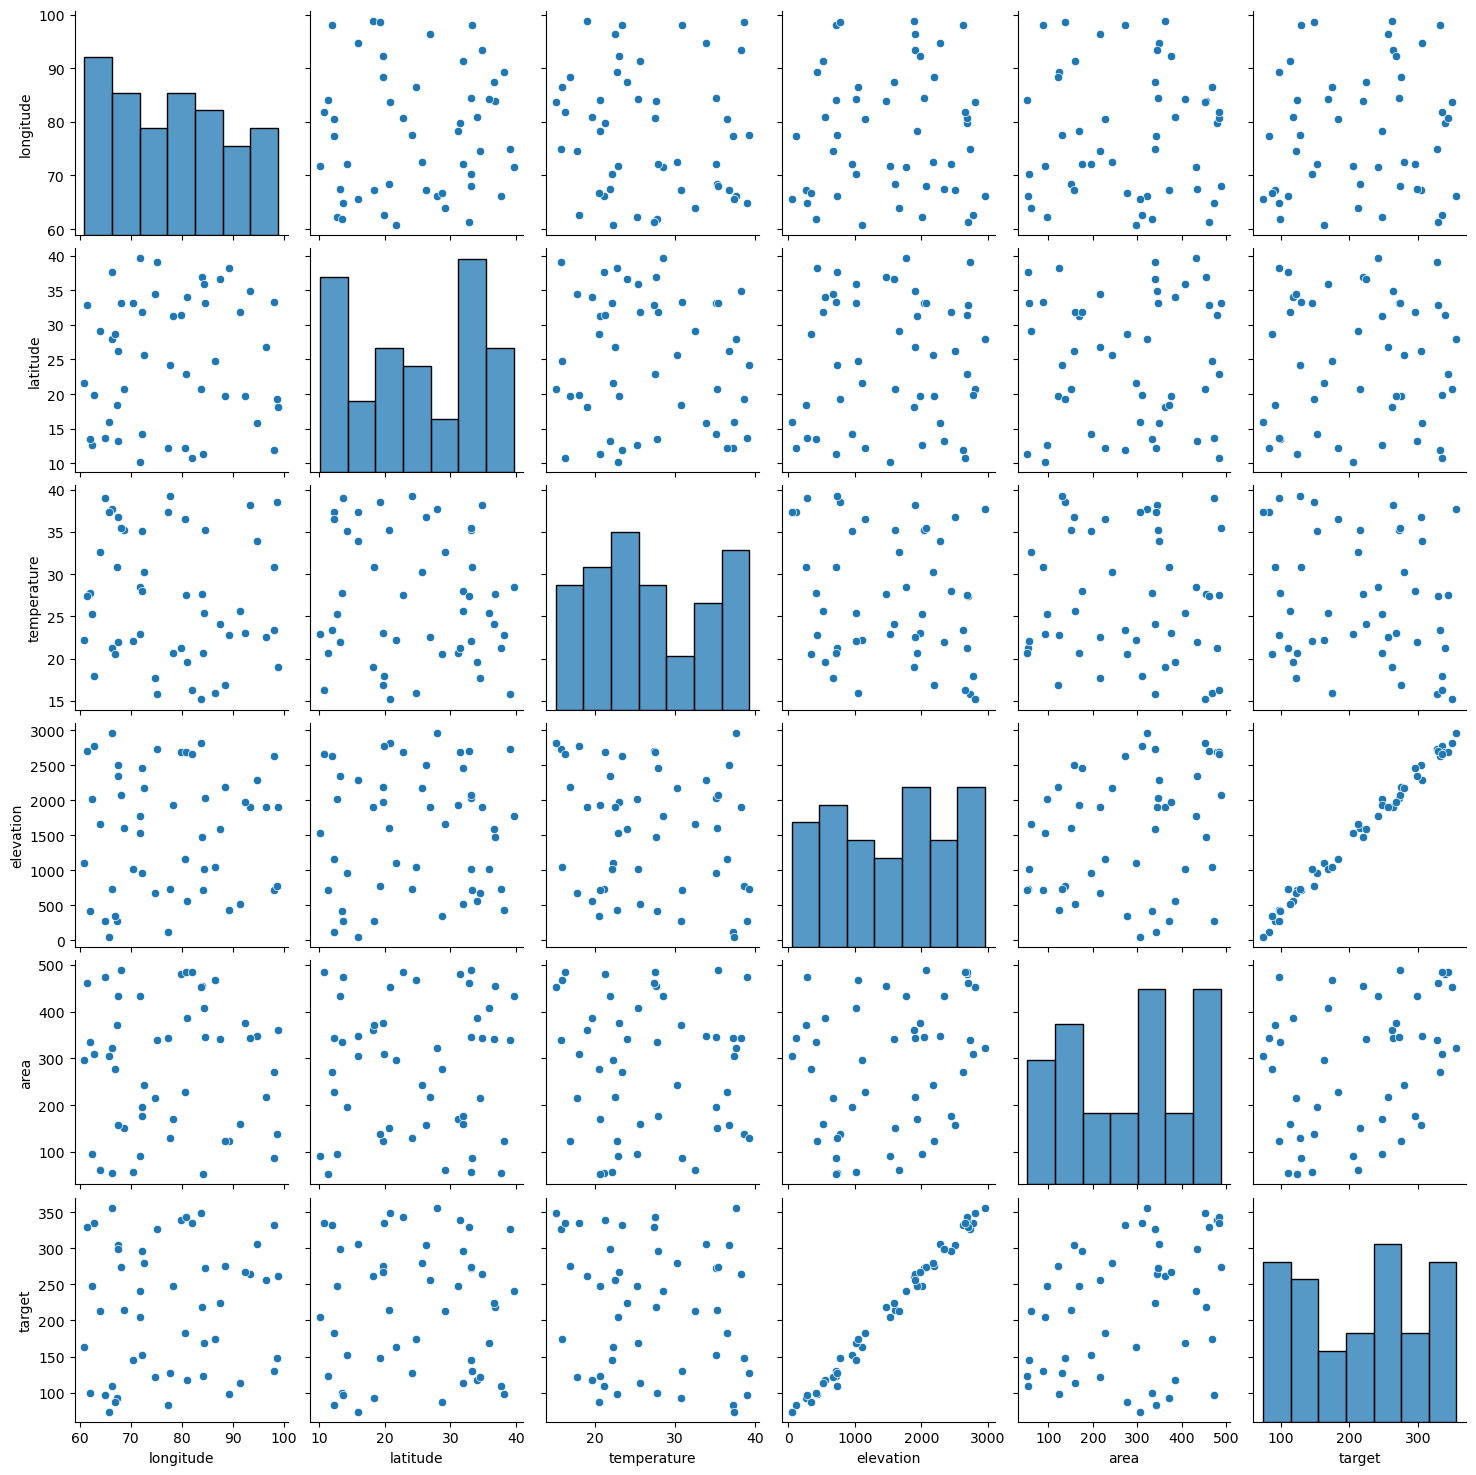

In [5]:
# 1. Linearity Check
sns.pairplot(data)
plt.show()

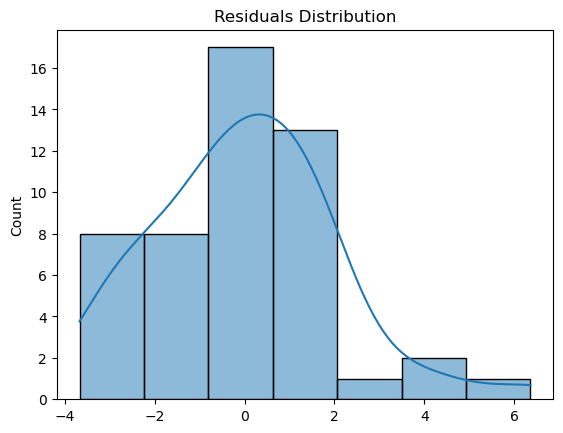

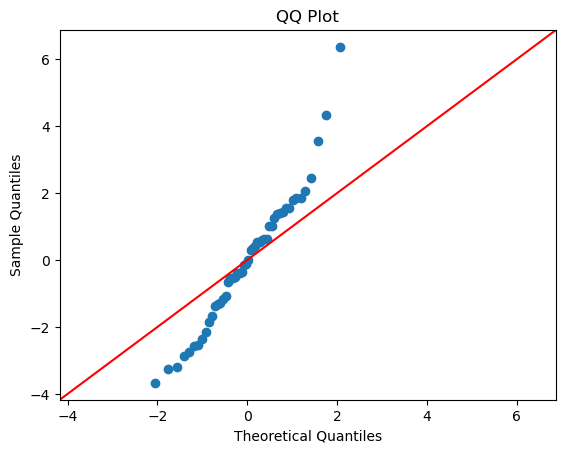

In [6]:
# 2. Normality Check of Residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

sm.qqplot(residuals, line='45')
plt.title("QQ Plot")
plt.show()

In [7]:
# 3. Multicollinearity Check (VIF Calculation)
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [8]:
print(calculate_vif(X.drop('const', axis=1)))

      Variable        VIF
0    longitude  19.057366
1     latitude   7.800414
2  temperature  10.471334
3    elevation   4.587869
4         area   5.451919


In [9]:
# 4. Autocorrelation Check (Durbin-Watson Test)
dw_statistic = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_statistic)

Durbin-Watson Statistic: 1.9751982725678043


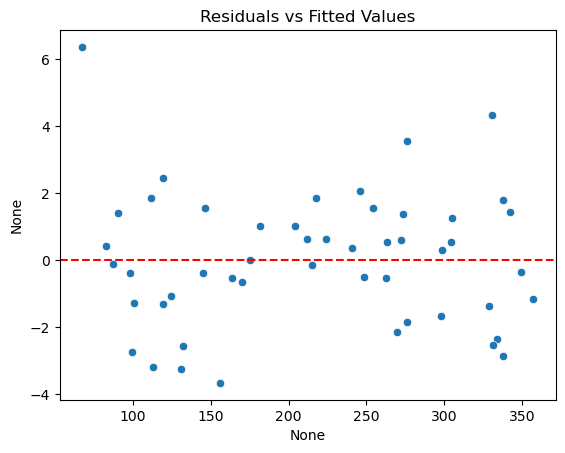

In [10]:
# 5. Homoscedasticity Check (Residuals vs. Fitted Values)
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.show()

### Q2

In [11]:
# Problem 2: Create sports dataset and test for multicollinearity
sports_data = pd.DataFrame({
    'speed': np.random.uniform(10, 30, 15),
    'agility': np.random.uniform(5, 20, 15),
    'strength': np.random.uniform(50, 100, 15),
    'stamina': np.random.uniform(30, 90, 15)
})
sports_data

,speed,agility,strength,stamina
0,25.903724,9.199008,73.708691,39.776066
1,15.416645,19.322979,54.891708,34.234125
2,18.779428,16.068454,74.580794,68.545157
3,11.569128,13.315311,73.673589,31.590679
4,10.507015,14.175811,58.660093,65.146535
5,29.252968,11.294001,71.692582,86.413814
6,26.719602,8.715965,69.925237,64.528451
7,23.919484,10.339590,80.792505,53.290196
8,18.179059,16.367692,81.754683,68.597293
9,13.465886,5.215902,52.265200,57.495173


In [12]:
# Check initial VIF
print("Initial VIF for sports dataset:")
print(calculate_vif(sports_data))

Initial VIF for sports dataset:
   Variable        VIF
0     speed  15.837679
1   agility   7.440479
2  strength  37.661464
3   stamina  17.754606


In [13]:
# Combine correlated variables (e.g., average of agility and speed)
sports_data['agility_speed_avg'] = (sports_data['agility'] + sports_data['speed']) / 2
sports_data.drop(['agility'], axis=1, inplace=True)
sports_data

,speed,strength,stamina,agility_speed_avg
0,25.903724,73.708691,39.776066,17.551366
1,15.416645,54.891708,34.234125,17.369812
2,18.779428,74.580794,68.545157,17.423941
3,11.569128,73.673589,31.590679,12.442219
4,10.507015,58.660093,65.146535,12.341413
5,29.252968,71.692582,86.413814,20.273485
6,26.719602,69.925237,64.528451,17.717784
7,23.919484,80.792505,53.290196,17.129537
8,18.179059,81.754683,68.597293,17.273375
9,13.465886,52.265200,57.495173,9.340894


In [14]:
# Check VIF after combining
print("VIF after combining correlated variables:")
print(calculate_vif(sports_data))

VIF after combining correlated variables:
            Variable        VIF
0              speed  33.134792
1           strength  37.661464
2            stamina  17.754606
3  agility_speed_avg  48.064705
